# <i><u><center>Multiple Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor,RandomForestRegressor
from sklearn.svm import SVR,LinearSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('./Admission_Predict_Ver1.1.csv')
data.head(10)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


In [3]:
data.drop(columns='Serial No.',inplace=True)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [5]:
data.shape

(500, 8)

In [6]:
data.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [7]:
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [8]:
data.duplicated().sum()

0

In [9]:
data.isnull().mean()*100

GRE Score            0.0
TOEFL Score          0.0
University Rating    0.0
SOP                  0.0
LOR                  0.0
CGPA                 0.0
Research             0.0
Chance of Admit      0.0
dtype: float64

## <li><u><i>Univariate Analysis

In [10]:
univariate_list = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA','Chance of Admit ']

### <i><u> Histogram

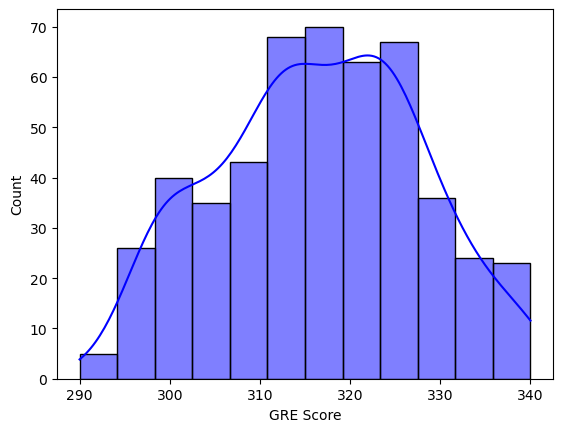

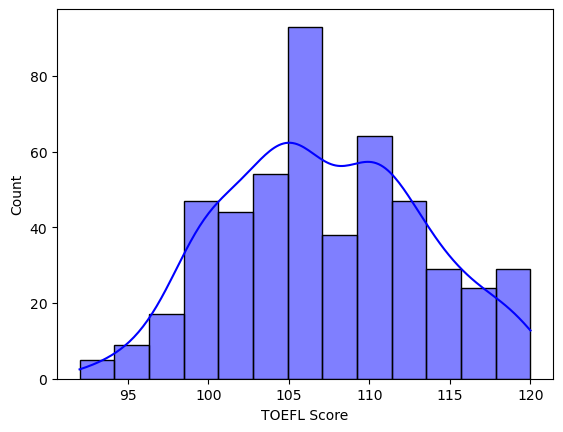

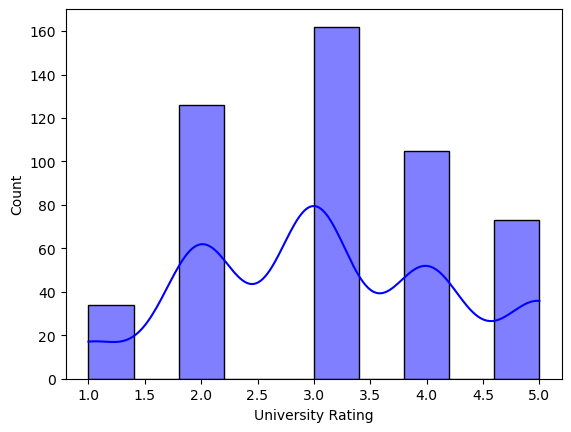

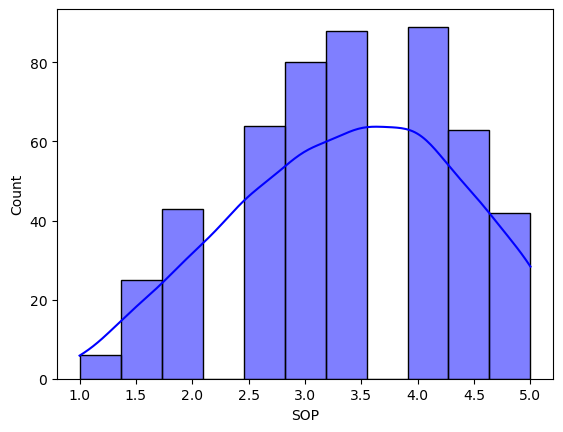

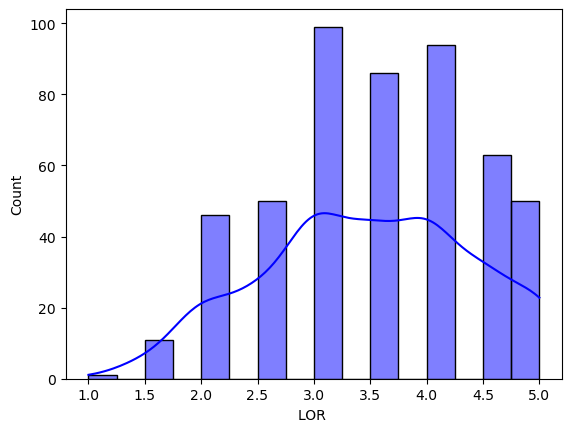

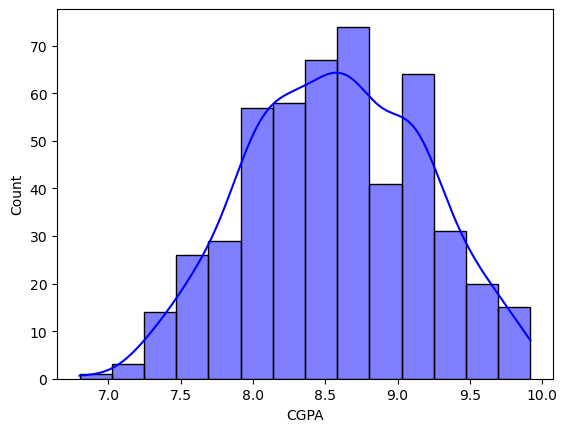

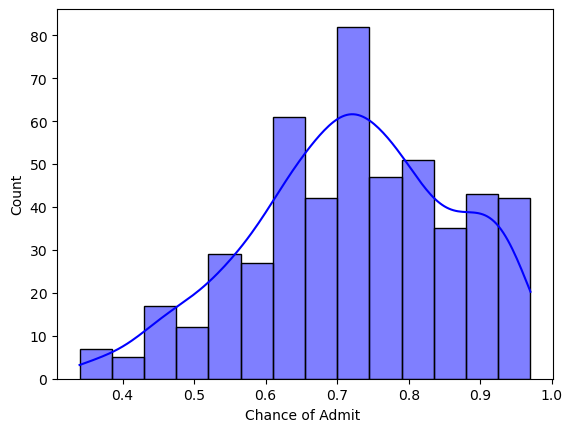

In [11]:
for i in univariate_list:
    sns.histplot(x = data[i],kde = True,color = 'Blue')
    plt.show()

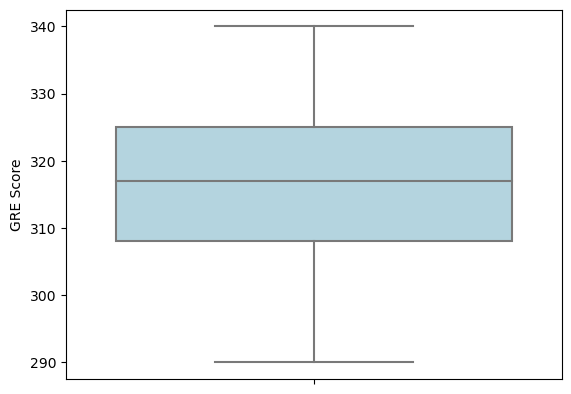

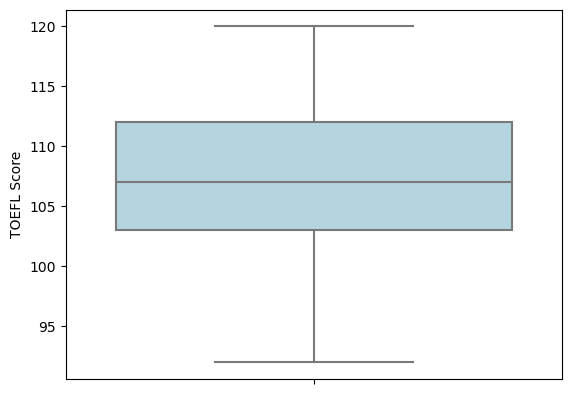

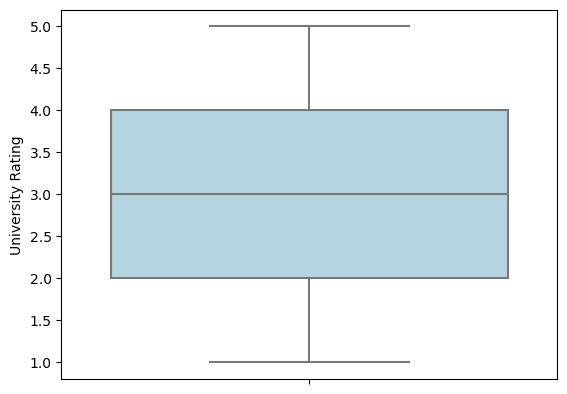

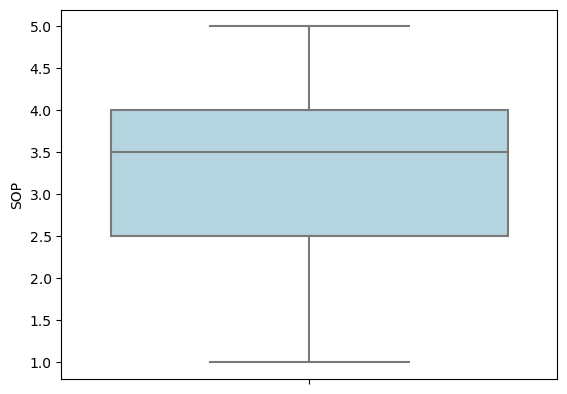

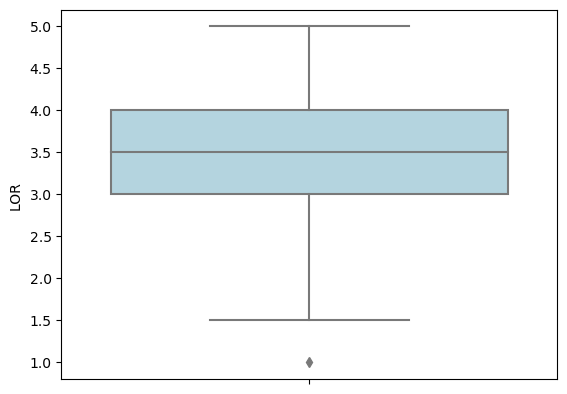

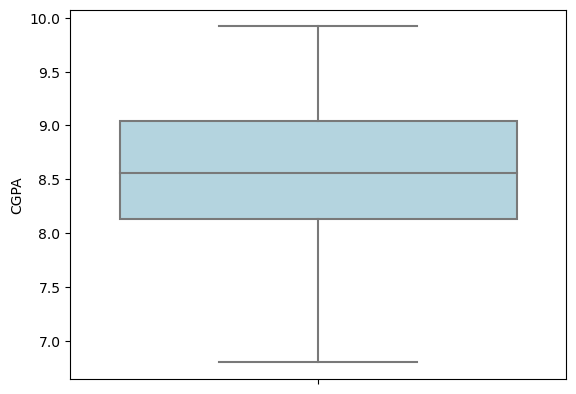

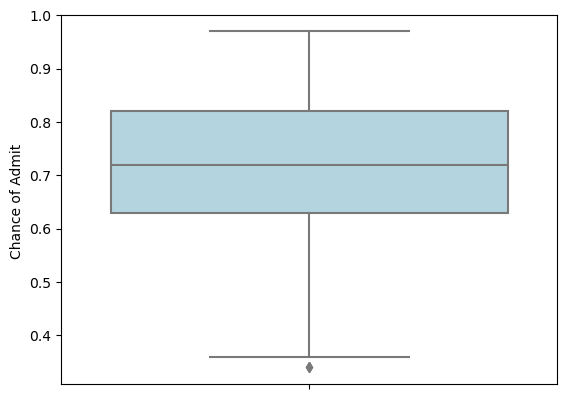

In [12]:
for i in univariate_list:
    sns.boxplot(y = data[i],color = 'LightBlue')
    plt.show()

## <i><u><li>Multivariate Analysis

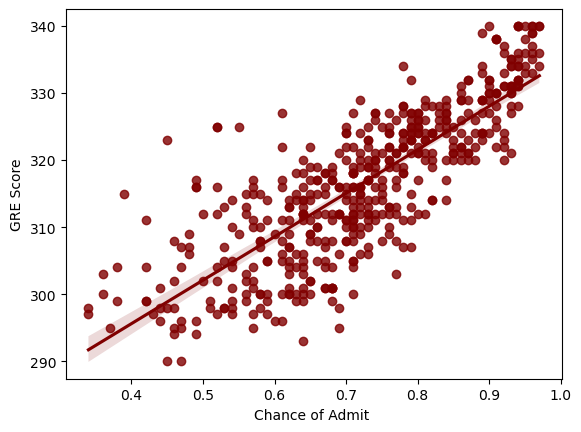

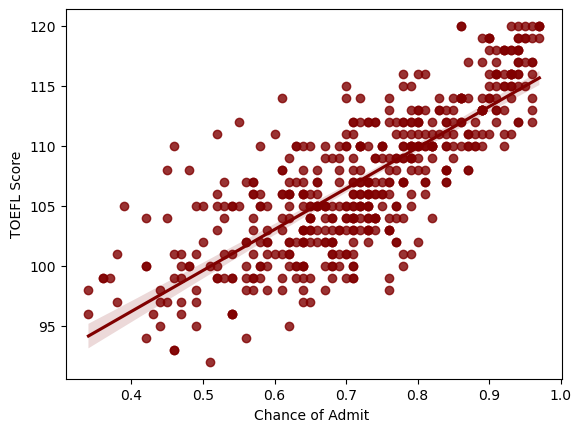

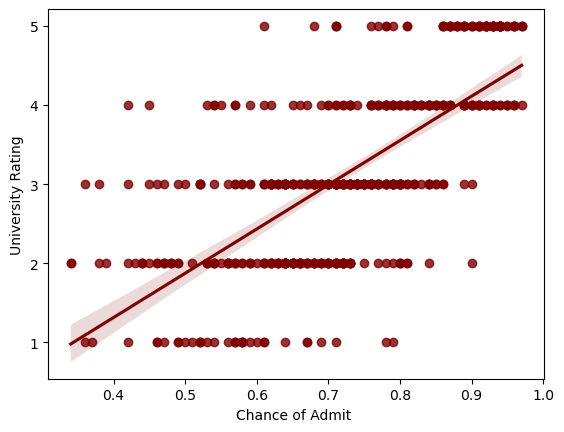

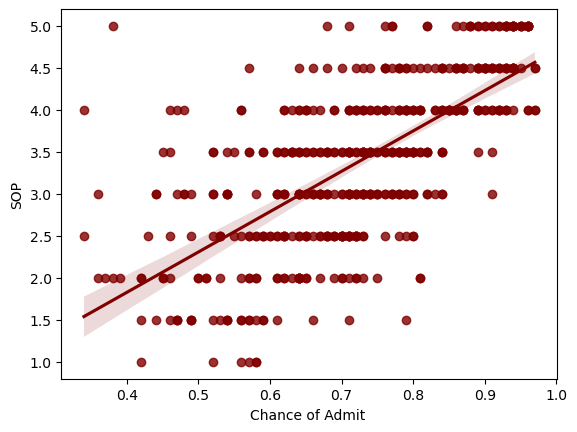

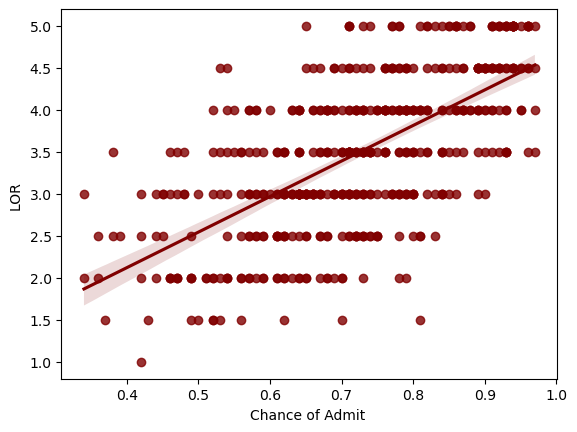

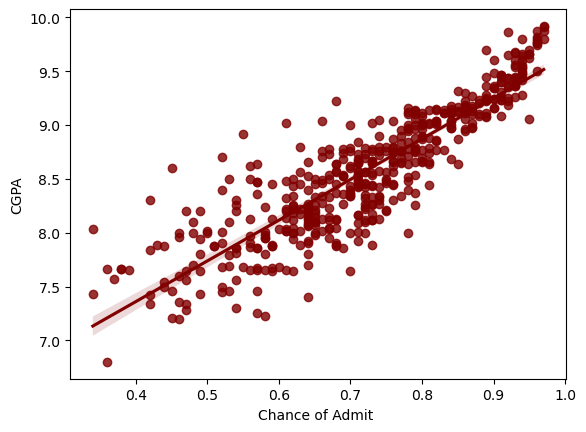

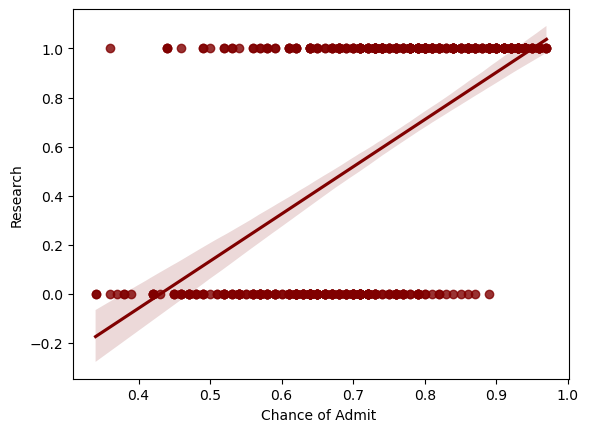

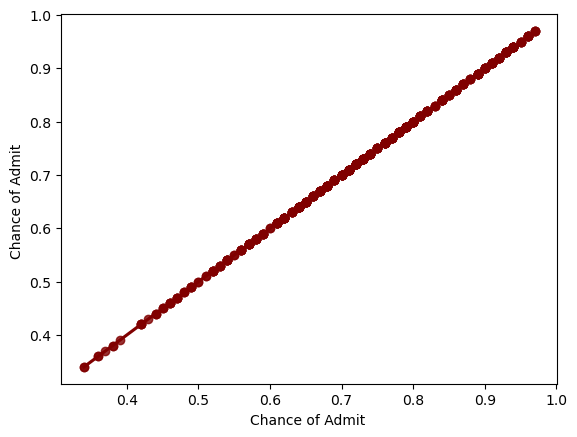

In [13]:
for i in data:
    sns.regplot(y = data[i],x = 'Chance of Admit ',data = data,color = 'maroon')
    plt.show()

### <i><u> Heatmap

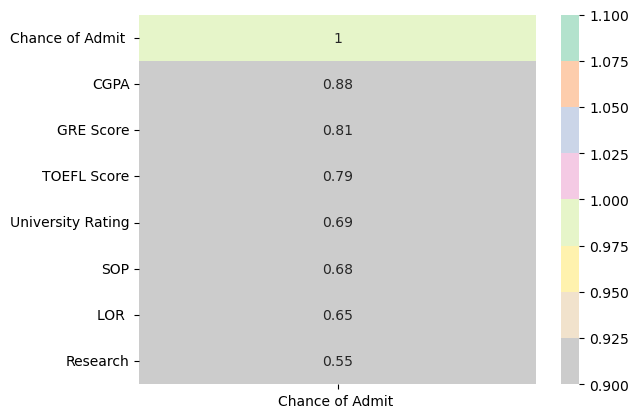

In [14]:
sns.heatmap(data.corr()[['Chance of Admit ']].sort_values(by= 'Chance of Admit ',ascending = False),vmax= 1,vmin = 1,annot = True,cmap= 'Pastel2_r')
plt.show()

## <i><u>Selecting Target of Feature

In [15]:
x = data.iloc[:,:-1].values
x

array([[337.  , 118.  ,   4.  , ...,   4.5 ,   9.65,   1.  ],
       [324.  , 107.  ,   4.  , ...,   4.5 ,   8.87,   1.  ],
       [316.  , 104.  ,   3.  , ...,   3.5 ,   8.  ,   1.  ],
       ...,
       [330.  , 120.  ,   5.  , ...,   5.  ,   9.56,   1.  ],
       [312.  , 103.  ,   4.  , ...,   5.  ,   8.43,   0.  ],
       [327.  , 113.  ,   4.  , ...,   4.5 ,   9.04,   0.  ]])

In [16]:
y = data.iloc[:,-1].values
y

array([0.92, 0.76, 0.72, 0.8 , 0.65, 0.9 , 0.75, 0.68, 0.5 , 0.45, 0.52,
       0.84, 0.78, 0.62, 0.61, 0.54, 0.66, 0.65, 0.63, 0.62, 0.64, 0.7 ,
       0.94, 0.95, 0.97, 0.94, 0.76, 0.44, 0.46, 0.54, 0.65, 0.74, 0.91,
       0.9 , 0.94, 0.88, 0.64, 0.58, 0.52, 0.48, 0.46, 0.49, 0.53, 0.87,
       0.91, 0.88, 0.86, 0.89, 0.82, 0.78, 0.76, 0.56, 0.78, 0.72, 0.7 ,
       0.64, 0.64, 0.46, 0.36, 0.42, 0.48, 0.47, 0.54, 0.56, 0.52, 0.55,
       0.61, 0.57, 0.68, 0.78, 0.94, 0.96, 0.93, 0.84, 0.74, 0.72, 0.74,
       0.64, 0.44, 0.46, 0.5 , 0.96, 0.92, 0.92, 0.94, 0.76, 0.72, 0.66,
       0.64, 0.74, 0.64, 0.38, 0.34, 0.44, 0.36, 0.42, 0.48, 0.86, 0.9 ,
       0.79, 0.71, 0.64, 0.62, 0.57, 0.74, 0.69, 0.87, 0.91, 0.93, 0.68,
       0.61, 0.69, 0.62, 0.72, 0.59, 0.66, 0.56, 0.45, 0.47, 0.71, 0.94,
       0.94, 0.57, 0.61, 0.57, 0.64, 0.85, 0.78, 0.84, 0.92, 0.96, 0.77,
       0.71, 0.79, 0.89, 0.82, 0.76, 0.71, 0.8 , 0.78, 0.84, 0.9 , 0.92,
       0.97, 0.8 , 0.81, 0.75, 0.83, 0.96, 0.79, 0.

## <i><u>Intialising Standard Scales

In [17]:
sc = StandardScaler()

In [18]:
x_sc = sc.fit_transform(x)
x_sc

array([[ 1.81923762,  1.77886545,  0.77558214, ...,  1.09894429,
         1.77680627,  0.88640526],
       [ 0.66714832, -0.03160087,  0.77558214, ...,  1.09894429,
         0.48585943,  0.88640526],
       [-0.0418297 , -0.52536441, -0.09979274, ...,  0.01730621,
        -0.95404281,  0.88640526],
       ...,
       [ 1.19888185,  2.10804114,  1.65095702, ...,  1.63976333,
         1.62785086,  0.88640526],
       [-0.39631872, -0.68995225,  0.77558214, ...,  1.63976333,
        -0.24236699, -1.12815215],
       [ 0.93301508,  0.95592621,  0.77558214, ...,  1.09894429,
         0.76721964, -1.12815215]])

## <i><u>Spliting data into training and testing

In [19]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42,shuffle = True)

In [20]:
x_test.shape

(100, 7)

# <i><u>Model Building

#### <i>Linear Regression

In [21]:
LR_model = LinearRegression()

### Fitting model wityh Training

In [22]:
LR_model.fit(x_train,y_train)

LinearRegression()

### Prediction using Dataset

In [23]:
y_pred = LR_model.predict(x_test)

In [24]:
y_pred

array([0.91457473, 0.79518127, 0.57265986, 0.70736968, 0.81588282,
       0.86206561, 0.47459746, 0.64850923, 0.82378728, 0.80741498,
       0.72193204, 0.72589118, 0.65632227, 0.93677168, 0.8241518 ,
       0.50979177, 0.83931942, 0.59727295, 0.53339576, 0.57155958,
       0.66548168, 0.55305833, 0.72232308, 0.79506004, 0.78027648,
       0.60248654, 0.94840363, 0.84741471, 0.62777011, 0.74343096,
       0.55533035, 0.73004034, 0.54474225, 0.86116288, 0.65713016,
       0.7371816 , 0.55423839, 0.95718977, 0.64364267, 0.71057279,
       0.97036982, 0.57495143, 0.67075391, 0.85830422, 0.94112903,
       0.57793762, 0.9583926 , 0.83902765, 0.79591651, 0.92570648,
       0.88805969, 0.56366238, 0.70359711, 0.52658929, 0.9536427 ,
       0.59746814, 0.95600396, 0.73916386, 0.66256982, 0.5012903 ,
       0.62950759, 0.68031188, 0.59896721, 0.59203806, 0.44085868,
       0.58866369, 0.8667547 , 0.89783006, 0.65831807, 0.70667392,
       0.6176818 , 0.78587721, 0.69152566, 0.56271019, 0.55429

### Evaluating the Accuracy

In [25]:
r2_score(y_test,y_pred)

0.8188432567829634

### Testing Accuracy

In [26]:
LR_model.score(x_test,y_test)

0.8188432567829634

### Training Accuracy

In [27]:
LR_model.score(x_train,y_train)

0.8210671369321554

### MAE

In [28]:
mean_absolute_error(y_test,y_pred)

0.04272265427705366

### MSE

In [29]:
mean_squared_error(y_test,y_pred)

0.003704655398788399

### Foot Mean Squared Error 

In [30]:
LR_output = pd.DataFrame(zip(y_test,y_pred),columns=['Actual','Prediction'])

In [31]:
LR_output

,Actual,Prediction
0,0.93,0.914575
1,0.84,0.795181
2,0.39,0.572660
3,0.77,0.707370
4,0.74,0.815883
...,...,...
95,0.42,0.435631
96,0.72,0.686643
97,0.72,0.785988
98,0.67,0.734694


### Plotting the Result 

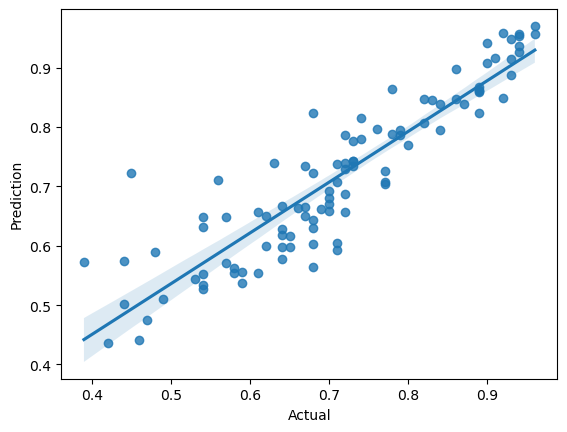

In [32]:
sns.regplot(data = LR_output,x = 'Actual', y = 'Prediction')
plt.show()

## <i> Creating a Dictionary models for iterative purpose

In [33]:
models = {
    'LinearRegression':LinearRegression(),
    'Ridge':Ridge(),
    'Lasso':Lasso(),
    'LinearSVR':LinearSVR(),
    'DecisionTreeRegressor':DecisionTreeRegressor(),
    'GradientBoostingRegressor':GradientBoostingRegressor(),
    'AdaBoostingRegressor':AdaBoostRegressor(),
    'RandomForestRegressor':RandomForestRegressor(random_state = 0)
}

### <i> Using a Loop for Model Training and Testing

In [41]:
for name,model in models.items():
    model.fit(x_train,y_train)
    print("Model Training with {}".format(name))
    trainingscore = model.score(x_train,y_train)*100
    testigscore   = model.score(x_test,y_test)*100
    score         = r2_score(y_test,model.predict(x_test))*100
    mae           = mean_absolute_error(y_test,model.predict(x_test))
    mse           = mean_squared_error(y_test,model.predict(x_test))
    rsme          = np.sqrt(mse)
    print('r2_score',score)
    print('trainingscore',trainingscore)
    print('testigscore',testigscore)
    print('score',score)
    print('mean_absolute_error',mae)
    print('mean_squared_error',mse)
    print('rsme',rsme)
    print("*" *100)

Model Training with LinearRegression
r2_score 81.88432567829635
trainingscore 82.10671369321554
testigscore 81.88432567829635
score 81.88432567829635
mean_absolute_error 0.04272265427705366
mean_squared_error 0.003704655398788399
rsme 0.060865880415783016
****************************************************************************************************
Model Training with Ridge
r2_score 81.7979348657508
trainingscore 82.101913817515
testigscore 81.7979348657508
score 81.7979348657508
mean_absolute_error 0.04287834886976059
mean_squared_error 0.0037223223199539636
rsme 0.06101083772539075
****************************************************************************************************
Model Training with Lasso
r2_score 25.54048110843906
trainingscore 25.04949095507699
testigscore 25.54048110843906
score 25.54048110843906
mean_absolute_error 0.09777992929911129
mean_squared_error 0.015226971613324213
rsme 0.12339761591426397
**********************************************************

In [35]:
data.columns.unique()

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

### <i>Outlier Treatment on LOR and Chance of Admit 



In [36]:
univariate = ['LOR ','Chance of Admit ']

In [37]:
def outlier_limit(univariate):
    Q3,Q1=np.nanpercentile(univariate,[75,25])
    IQR = Q3-Q1
    UL = Q3+1.5*IQR
    LL = Q1-1.5*IQR
    return UL,LL

In [38]:
for i in univariate:
    UL,LL = outlier_limit(data[i])
    data[i] = np.where((data[i]>UL) | (data[i]<LL),np.nan, data[i])

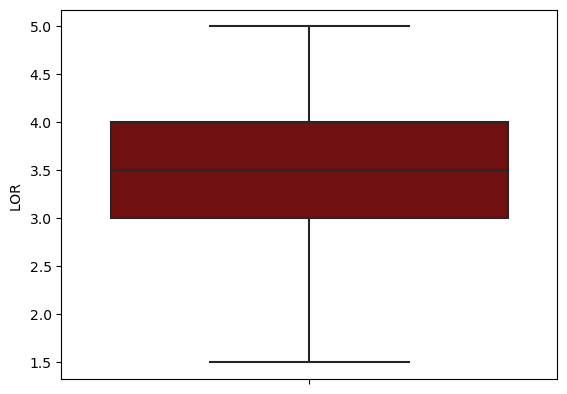

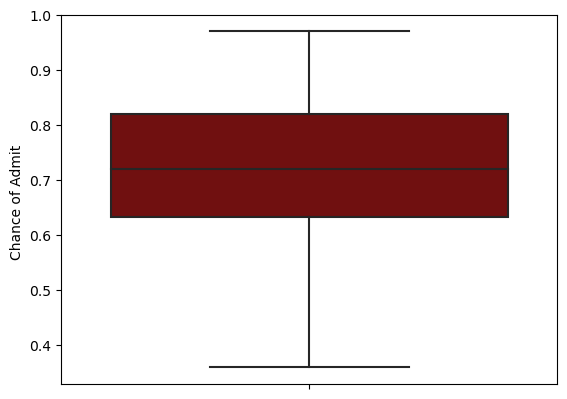

In [39]:
for i in univariate:
    sns.boxplot(y = data[i],color='maroon')
    plt.show()

In [40]:
data.dropna(inplace=True)